In [6]:
# import libraries
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt
import seaborn as sns
# imprt data 
OnlineRetail_db = r'c:\Users\HP\Documents\edu\data mining\end  sem exams\online+retail\OnlineRetail.db'

In [2]:
# connection function for salesfacts
def connection():
    conn= sqlite3.connect(r'c:\Users\HP\Documents\edu\data mining\end  sem exams\online+retail\OnlineRetail.db')
    if conn is not None:
        print("Connection to database is successful")
    else :
        print("Connection to database failed")    
    return conn
conn= connection()



Connection to database is successful


In [12]:
# Querries
# Rollup-  total sales grouped by country and quarter
Quarterly_sales_by_country = """
SELECT 
    Country,
    -- Manual Quarter Calculation: Year + "-Q" + ((Month + 2) / 3)
    STRFTIME('%Y', InvoiceDate) || '-Q' || ((CAST(STRFTIME('%m', InvoiceDate) AS INT) + 2) / 3) AS Quarter,
    SUM(TotalPrice) AS TotalSales
FROM OnlineRetail
GROUP BY Quarter, Country
ORDER BY Quarter
"""
Quarterly_sales_by_country_df = pd.read_sql_query(Quarterly_sales_by_country, conn)
print(Quarterly_sales_by_country_df,'\n')

# Drilll down- united kingdom orders by month
UK_monthly_orders = """
SELECT 
    SUM(TotalPrice) AS MonthlySales,
    STRFTIME('%Y-%m', DATETIME(InvoiceDate)) AS Month
FROM  OnlineRetail
WHERE Country = 'United Kingdom'
GROUP BY Month
"""
UK_monthly_orders_df = pd.read_sql_query(UK_monthly_orders, conn)
print(UK_monthly_orders_df,'\n')

# how many uk customers monthly in 2011
UK_monthly_customers = """
SELECT DISTINCT COUNT(CustomerID) AS MonthlyCustomers,
    STRFTIME('%Y-%m', DATETIME(InvoiceDate)) AS Month
FROM  OnlineRetail
WHERE Country = 'United Kingdom' AND STRFTIME('%Y', InvoiceDate) = '2011'
GROUP BY Month
"""
UK_monthly_customers_df = pd.read_sql_query(UK_monthly_customers, conn)
print(UK_monthly_customers_df,'\n')

# slice- due to lack of category column in product_dim table, we will slice based on product names containing 'bag'
bag_sales = """
select SUM(TotalPrice) AS BagSales, Description
From OnlineRetail  
WHERE Description LIKE '%bag%'

"""

bag_sales_df = pd.read_sql_query(bag_sales, conn)
print(bag_sales_df,'\n')

# Visits monthly trend
monthly_visits = """
SELECT 
    STRFTIME('%Y-%m', DATETIME(InvoiceDate)) AS Month,
    COUNT(DISTINCT InvoiceNo) AS MonthlyVisits
FROM OnlineRetail
GROUP BY Month 
ORDER BY Month
"""
monthly_visits_df = pd.read_sql_query(monthly_visits, conn)
print(monthly_visits_df,'\n')


             Country  Quarter  TotalSales
0          Australia  2011-Q1    40937.12
1            Austria  2011-Q1     2226.48
2            Belgium  2011-Q1     6733.25
3             Canada  2011-Q1      140.54
4    Channel Islands  2011-Q1     5969.62
..               ...      ...         ...
117           Sweden  2011-Q4     8726.39
118      Switzerland  2011-Q4    16169.69
119              USA  2011-Q4     3196.44
120   United Kingdom  2011-Q4  2846957.95
121      Unspecified  2011-Q4      965.75

[122 rows x 3 columns] 

    MonthlySales    Month
0     559975.830  2011-01
1     428986.620  2011-02
2     584810.780  2011-03
3     475677.631  2011-04
4     638104.890  2011-05
5     618345.530  2011-06
6     600919.071  2011-07
7     606784.930  2011-08
8     895098.642  2011-09
9     935404.140  2011-10
10   1319934.070  2011-11
11    591619.740  2011-12 

    MonthlyCustomers    Month
0              30923  2011-01
1              24629  2011-02
2              32308  2011-03
3         

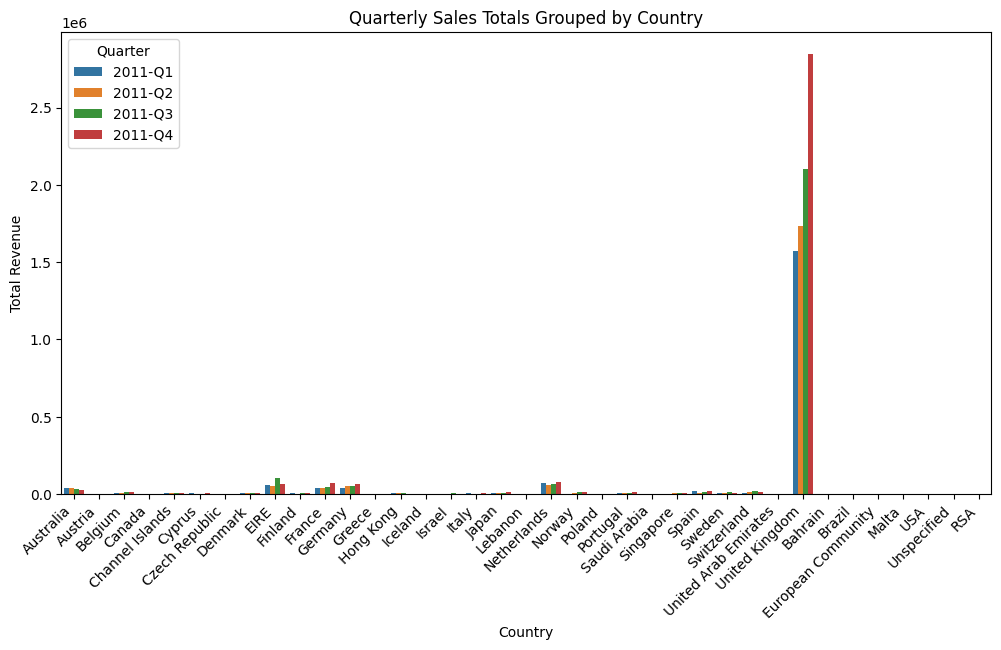

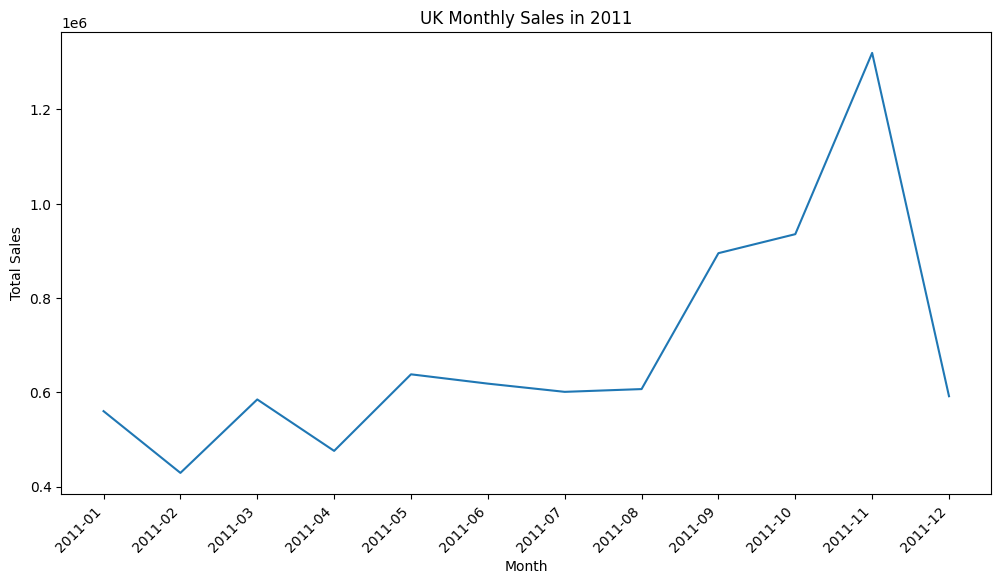

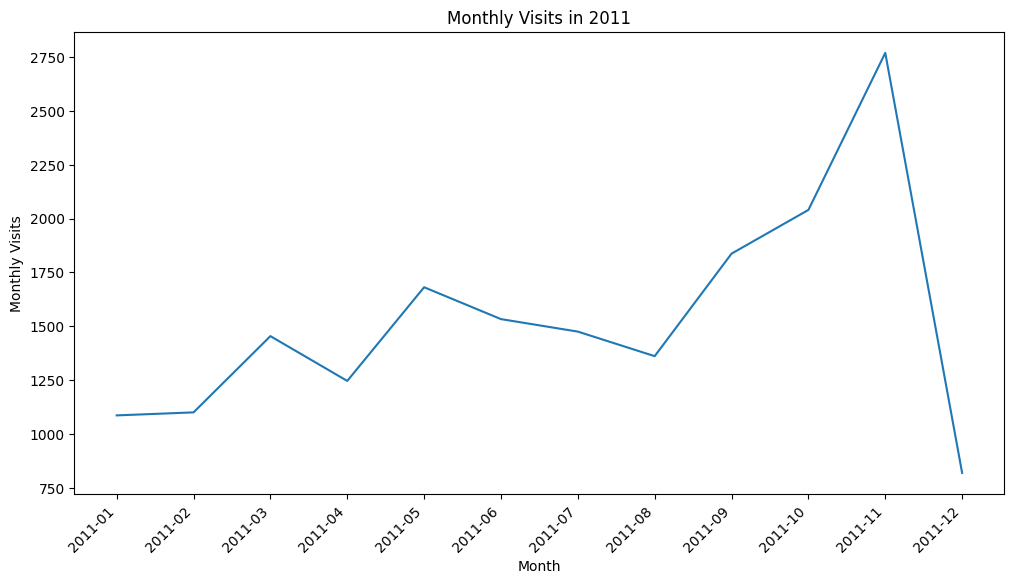

In [14]:
# make plots for analysis
# Quarterly sales by country plot
plt.figure(figsize=(12, 6))
sns.barplot(x='Country',y='TotalSales',hue='Quarter', data=Quarterly_sales_by_country_df)
plt.title('Quarterly Sales Totals Grouped by Country')
plt.xlabel('Country') 
plt.ylabel('Total Revenue')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Quarter', loc='upper left')
plt.show()

# UK monthly orders plot
plt.figure(figsize=(12, 6))
sns.lineplot(x='Month', y='MonthlySales', data=UK_monthly_orders_df)
plt.title('UK Monthly Sales in 2011')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.xticks(rotation=45, ha='right')
plt.show() 

# monthly visits plot
plt.figure(figsize=(12, 6))
sns.lineplot(x='Month', y='MonthlyVisits', data=monthly_visits_df)
plt.title('Monthly Visits in 2011')
plt.xlabel('Month')
plt.ylabel('Monthly Visits')
plt.xticks(rotation=45, ha='right')
plt.show() 



### Insights
## quaterly sales
There is a general trend of increase in sales as the year progresses. The end of the year (q4) has the highest sales of the year. It is likely because of tourisim increase around this time. 
## Uk monthly sales
The united kingdom contributes the highest to the store sales. The general trend for sales matches the visits data. The slowest month was february with about 450000 in sales and they gradually increase as the year progresses. The year's peak is in November with around 1.2 million in sales, after which there is a sharp decline. News at the time shoe that there was severe flooding the year before at around the same time. This could be the reason for the sharp decline of visitors to the store.
## Total monthly visits
The number of customer visits follows the sales data. The least visited month is December with around 800 total visits . The highest number of visits was recorded in November with around 2750 visits. This gives a bit more weight to the idea of tourists avoiding the area due to the dlooding the year before.

### How the warehouse supports decision making
With the analysis the store has information to plan for the next year accordingly. For instance due to the high UK customers there could be a push to hire english speaking workers. The monthly visits trend helps by ensuring the store has the most effective numbet of workers with less at the beginning of the year and more towaeds November.
